      Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0         1        NaN   24  Female                            25.06   
1         2        NaN   22  Female                            25.78   
2         3        NaN   23  Female                            23.83   
3         4        NaN   20  Female                            26.12   
4         5        NaN   20  Female                            26.36   
...     ...        ...  ...     ...                              ...   
1095   1096        NaN   24    Male                            24.29   
1096   1097        NaN   22    Male                            25.22   
1097   1098        NaN   25    Male                            24.24   
1098   1099        NaN   21    Male                            24.87   
1099   1100        NaN   23    Male                            24.51   

      intercanine distance casts  right canine width intraoral  \
0                          25.05                          6.08   
1  

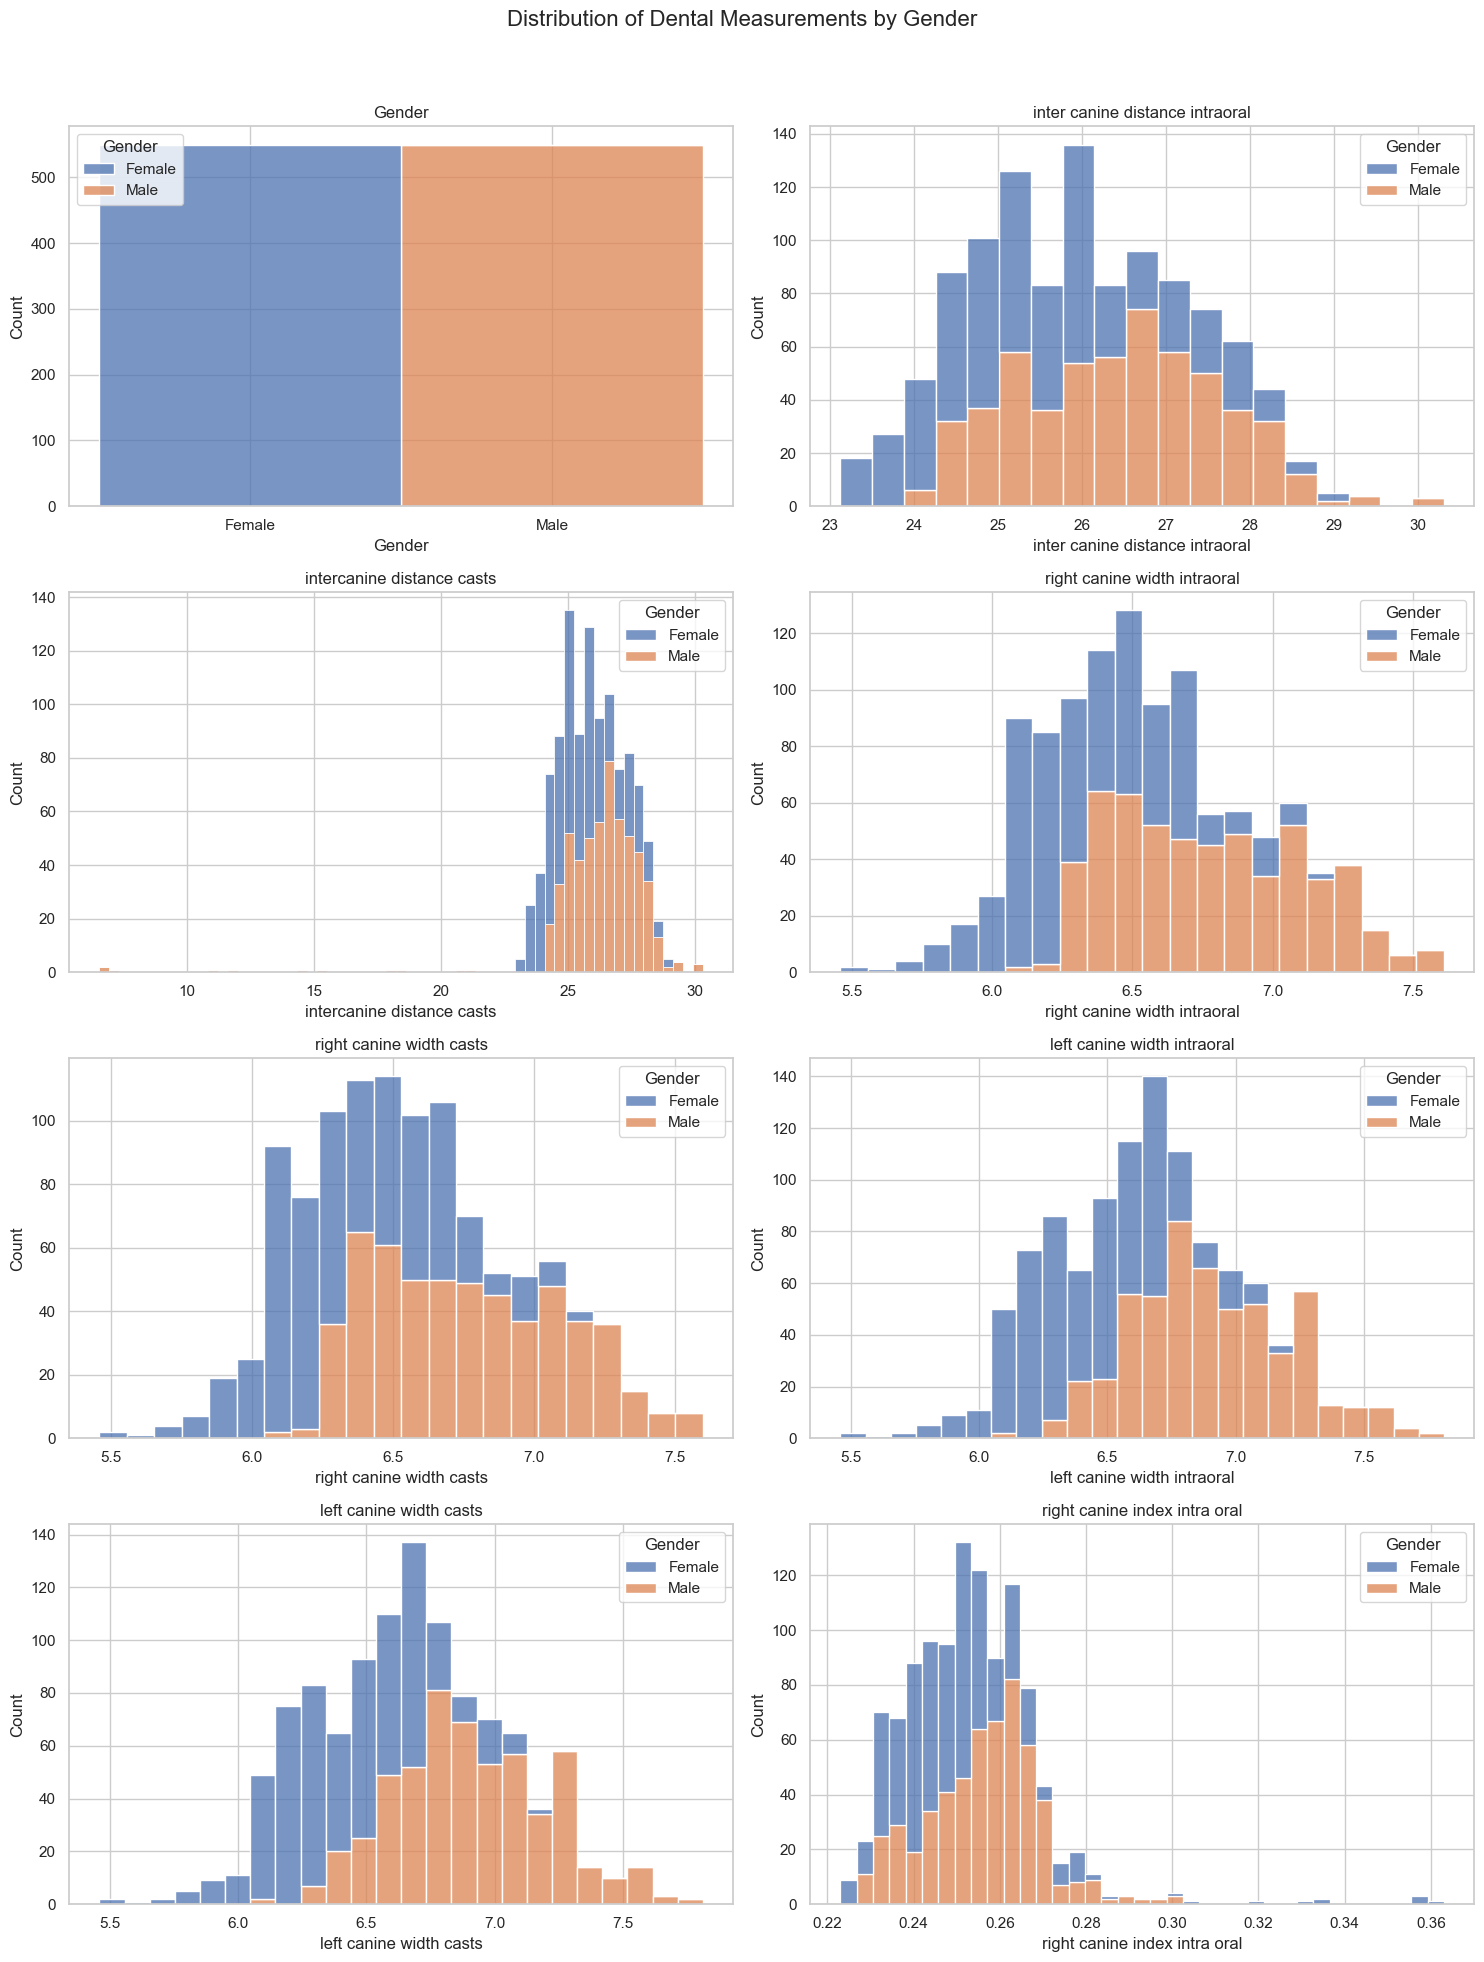

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [4]:
import pandas as pd
data=pd.read_csv("C:\Dentistry Dataset.csv")
print(data)

data_cleaned = data.drop(columns=['Sample ID'])
print(data_cleaned.isnull().sum())
data_cleaned = data_cleaned.dropna()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribution of Dental Measurements by Gender', fontsize=16)

columns_to_plot = data_cleaned.columns[2:]

for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.histplot(data=data_cleaned, x=column, hue='Gender', multiple='stack', ax=ax)
    ax.set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

from scipy.stats import ttest_ind

for column in data_cleaned.columns[2:]:
    male = data_cleaned[data_cleaned['Gender'] == 'Male'][column]
    female = data_cleaned[data_cleaned['Gender'] == 'Female'][column]
    t_stat, p_val = ttest_ind(male, female)
    print(f'{column}: t-statistic = {t_stat}, p-value = {p_val}')
    
data_cleaned['canine_ratio'] = data_cleaned['right canine width intraoral'] / data_cleaned['left canine width intraoral'] 

from sklearn.model_selection import train_test_split
X = data_cleaned.drop('Gender', axis=1)
y = data_cleaned['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained successfully.')
    
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))  
    
import joblib
best_model = models['Random Forest']
joblib.dump(best_model, 'best_model.pkl')   